In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
%matplotlib inline

In [13]:
data = pd.read_csv('PHASEdata.csv',header=None, skiprows=1)
z = data[0]
#print(z)
z_approach = z[:500]
z_retract = z[500:]
#print(z_approach)
#print(z_retract)

#phase shift
pslist = []
for k in range(len(z)):
    phaseshift = data.iloc[k,1:]  #[from zero row to the end row, from second column to the last column]
    #print(phaseshift)
    ps = np.array(phaseshift)
    ps_reshape = np.reshape(ps,(48,48))
    pslist.append(ps_reshape)
#print(pslist)

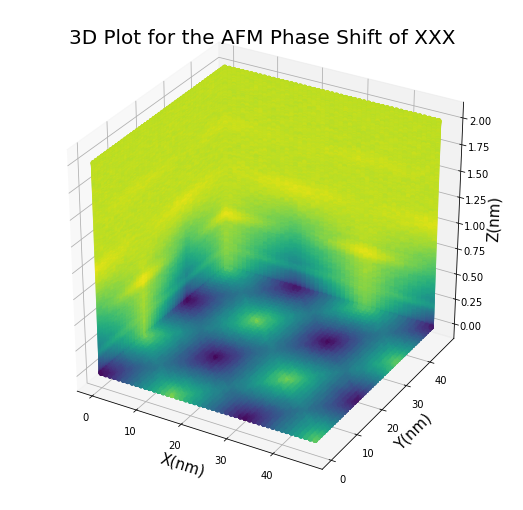

In [14]:
a = np.linspace(0, 47, 48)
b = np.linspace(0, 47, 48)
c = z_approach
x, z, y = np.meshgrid(a, c, b)

#phaseshift information as intensity case
psasas = []
for k in range(len(c)):
    C = pslist[k]
    for i in range(len(a)):
        B = pslist[k][i]
        for j in range(len(b)):
            A = pslist[k][i][j]
            psasas.append(A)
l = psasas

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=l, alpha=0.4)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('3D Plot for the AFM Phase Shift of XXX', fontsize=20)
plt.show()

### Z Axis Slicing:

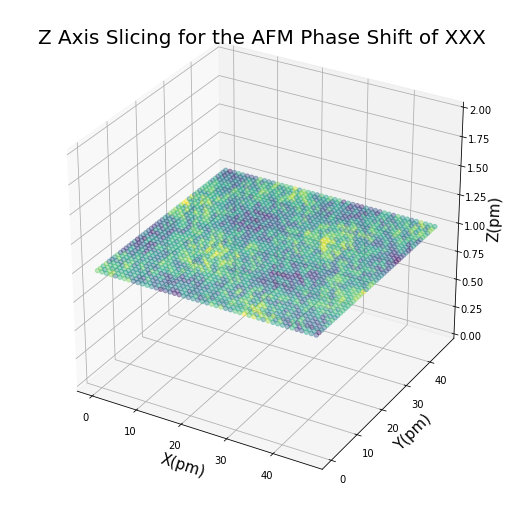

In [15]:
k = 250
a = np.linspace(0, 47, 48)
b = np.linspace(0, 47, 48)
c = z_approach[k]
x, z, y = np.meshgrid(a, c, b)

#phaseshift information as intensity case
psasas = []
for i in range(len(a)):
    for j in range(len(b)):
        C = pslist[k][i][j]
        psasas.append(C)
l = psasas

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=l, alpha=0.4)
ax.set_zlim(top=2, bottom=0)
ax.set_xlabel('X(pm)', fontsize=15)
ax.set_ylabel('Y(pm)', fontsize=15)
ax.set_zlabel('Z(pm)', fontsize=15)
ax.set_title('Z Axis Slicing for the AFM Phase Shift of XXX', fontsize=20)
plt.show()

### Y Axis Slicing:

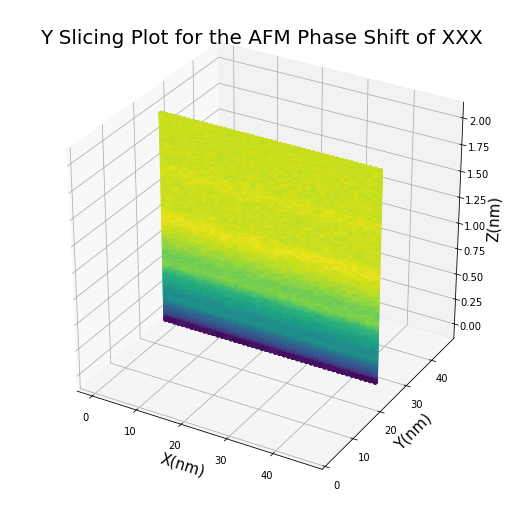

In [16]:
i = 24
a = np.linspace(0, 47, 48)
b = np.linspace(0, 47, 48)[i]
c = z_approach
x, z, y = np.meshgrid(a, c, b)

psasas = []
for k in range(len(c)):
    for j in range(len(a)):
        A = (pd.DataFrame(pslist[k]).iloc[i])[j]
        psasas.append(A)
l = psasas

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=l, alpha=0.4)
ax.set_ylim(top=48, bottom=0)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('Y Slicing Plot for the AFM Phase Shift of XXX', fontsize=20)
plt.show()

### X Axis Slicing:

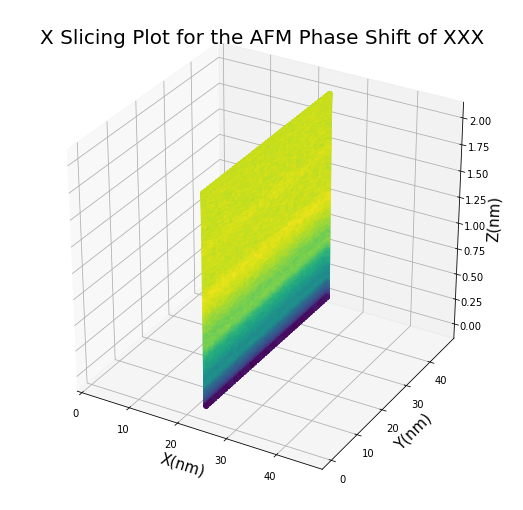

In [17]:
j = 24
a = np.linspace(0, 47, 48)[j]
b = np.linspace(0, 47, 48)
c = z_approach
x, z, y = np.meshgrid(a, c, b)

psasas = []
for k in range(len(c)):
    for i in range(len(b)):
        B = (pd.DataFrame(pslist[k]).transpose().iloc[j])[i]
        psasas.append(B)
l = psasas

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=l, alpha=0.4)
ax.set_xlim(left=0, right=48)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('X Slicing Plot for the AFM Phase Shift of XXX', fontsize=20)
plt.show()

### Animation:

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

data = pd.read_csv('PHASEdata.csv',header=None, skiprows=1)
z = data[0]
#print(z)
z_approach = z[:500]
z_retract = z[500:]
#print(z_approach)
#print(z_retract)

#phase shift
pslist = []
for k in range(len(z)):
    phaseshift = data.iloc[k,1:]  #[from zero row to the end row, from second column to the last column]
    #print(phaseshift)
    ps = np.array(phaseshift)
    ps_reshape = np.reshape(ps,(48,48))
    pslist.append(ps_reshape)
#print(pslist)

fig = plt.figure(figsize=(9,9))
ax = p3.Axes3D(fig)

def gen(n):
    i = 0
    while i < 48:
        a = np.linspace(0, 47, 48)
        b = np.linspace(0, 47, 48)[i]
        c = z_approach
        yield x, z, y = np.meshgrid(a, c, b)
        i += i+1

psasas = []
for k in range(len(c)):
    for j in range(len(a)):
        A = (pd.DataFrame(pslist[k]).iloc[i])[j]
        psasas.append(A)
l = psasas

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=l, alpha=0.4)
ax.set_ylim(top=48, bottom=0)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('X Slicing Plot for the AFM Phase Shift of XXX', fontsize=20)

ani = animation.FuncAnimation(fig, update, N, fargs=(data, line), interval=10000/N, blit=False)

plt.show()

In [ ]:
j = 24
a = np.linspace(0, 47, 48)[j]
b = np.linspace(0, 47, 48)
c = z_approach
x, z, y = np.meshgrid(a, c, b)

psasas = []
for k in range(len(c)):
    for i in range(len(b)):
        B = (pd.DataFrame(pslist[k]).transpose().iloc[j])[i]
        psasas.append(B)
l = psasas

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=l, alpha=0.4)
ax.set_xlim(left=0, right=48)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('X Slicing Plot for the AFM Phase Shift of XXX', fontsize=20)
plt.show()

<IPython.core.display.Javascript object>


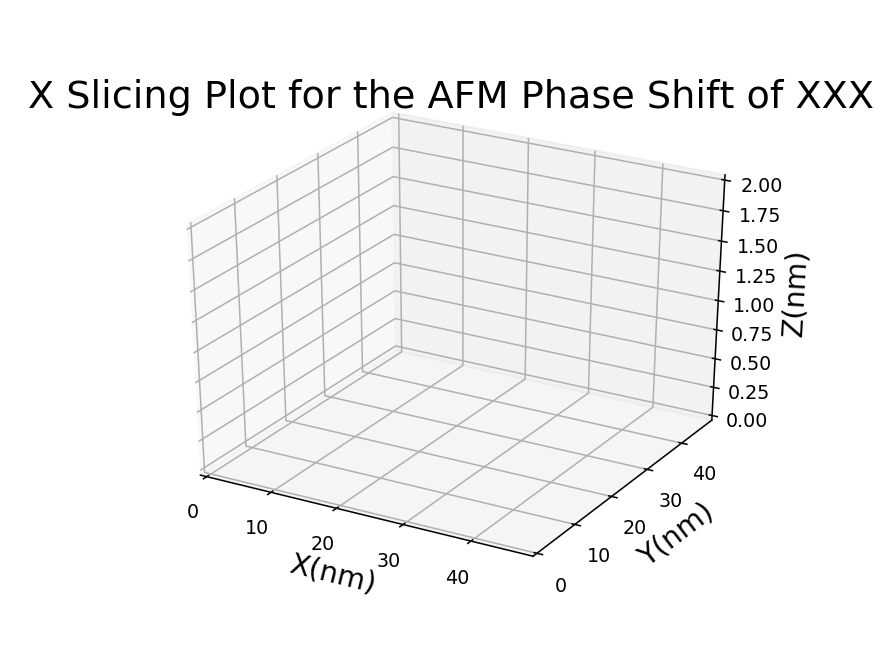

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator


#---------------------------------------------------------------------------------------------------------------
data = pd.read_csv('PHASEdata.csv',header=None, skiprows=1)
z = data[0]
#print(z)
z_approach = z[:500]
z_retract = z[500:]
#print(z_approach)
#print(z_retract)

#phase shift
pslist = []
for k in range(len(z)):
    phaseshift = data.iloc[k,1:]  #[from zero row to the end row, from second column to the last column]
    #print(phaseshift)
    ps = np.array(phaseshift)
    ps_reshape = np.reshape(ps,(48,48))
    pslist.append(ps_reshape)
#print(pslist)
#----------------------------------------------------------------------------------------------------------------
for i in range(0, 48):
    a = np.linspace(0, 47, 48)[i]
    b = np.linspace(0, 47, 48)
    c = z_approach
x, z, y = np.meshgrid(a,c,b)
    
nFrames = 48

# Set up plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(left=0, right=48)
ax.set_ylim(top=48, bottom=0)
ax.set_zlim(bottom=0, top=2)
ax.set_xlabel('X(nm)', fontsize=15)
ax.set_ylabel('Y(nm)', fontsize=15)
ax.set_zlabel('Z(nm)', fontsize=15)
ax.set_title('X Slicing Plot for the AFM Phase Shift of XXX', fontsize=20)

# Animation function
def animate(i):
    for i in range(0, 48):
        a = np.linspace(0, 47, 48)
        b = np.linspace(0, 47, 48)
        c = z_approach
        x, z, y = np.meshgrid(a,c,b)
        
    #phaseshift information as intensity case
    psasas = []
    for i in range(len(a)):
        for j in range(len(b)):
            C = pslist[0][i][j]
            psasas.append(C)
    l = psasas
    
    cont = plt.scatter(x, y, z, c=l, alpha=0.4)

    return cont

anim = animation.FuncAnimation(fig, animate, frames=nFrames)
plt.show()

<IPython.core.display.Javascript object>


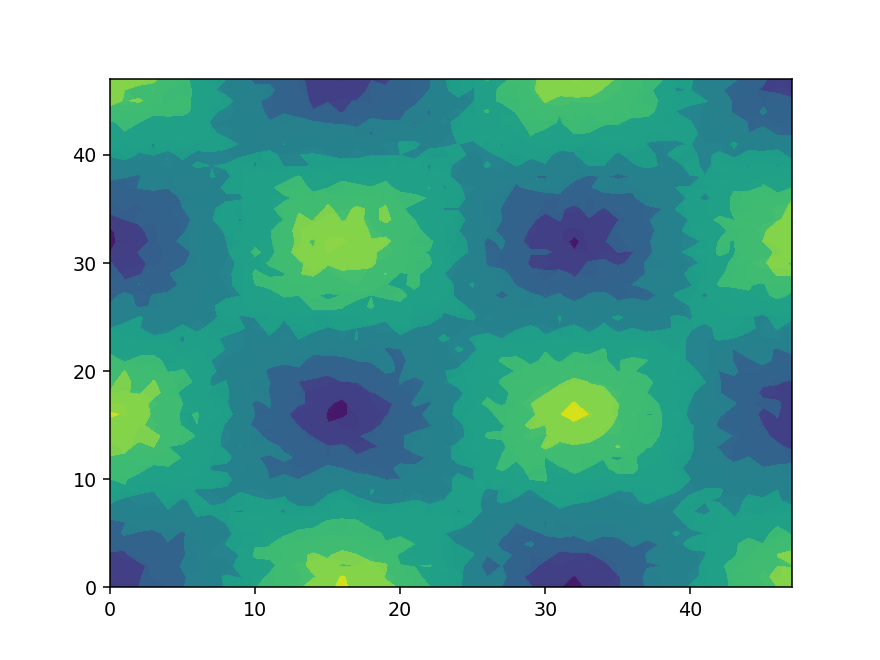

In [18]:
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

def import_data_retract(file):
    """
    Function to import data file and clean for use in graphing code
    
    import file as CSV!
    
    returns shaped np array (500,48,48)
    
    """
    data = pd.read_csv(file)
    data.rename(columns={'Phase ': 'Unnamed: 1'}, inplace=True) ##this is specific
            ##to the example data might not need in the future.
    i = iter(range(1, len(data.columns) + 1)) ##replace unnamed columns with 
    data.columns = [x if not x.startswith('Unnamed') else next(i) for x in data.columns]
    data = pd.DataFrame(data)
    retract = data[-500:]
    retract = retract.drop(['Z (nm)'], axis=1)
    retract_as_numpy = retract.as_matrix(columns=None)
    retract_as_numpy_reshape = np.array(retract_as_numpy.tolist())
    retract_as_numpy_reshape1 = retract_as_numpy.reshape(500,48,48)
    return retract_as_numpy_reshape1

retract_as_numpy_reshape1 = import_data_retract("PHASEdataCSV1.csv")

x = np.linspace(0, 47, 48)
y = np.linspace(0, 47, 48)
X, Y = np.meshgrid(x, y)
nFrames = 500
for i in range(1,501): 
    retract_as_numpy_reshape1[i-1,:,:]

# Set up plotting
fig = plt.figure()
ax = plt.axes()  

# Animation function
def animate(i): 
    z = retract_as_numpy_reshape1[i,:,:]
    cont = plt.contourf(X, Y, z, alpha=0.9, cmap = 'viridis')

    return cont  

anim = animation.FuncAnimation(fig, animate, frames=nFrames)
plt.show()